In [1]:
%matplotlib inline

import pandas as pd

import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../data/hr_neighbors.csv").drop_duplicates(["time", "mac"])

print "total number of lines =", len(df)

excluded_macs = ["00-17-0d-00-00-58-f8-63",
                 "00-17-0d-00-00-58-f8-78",
                 "00-17-0d-00-00-58-eb-69",
                ]
df_clean = df[(df.numTxPackets > 0) & (df.numTxFailures >= 0) & (df.rssi<0)
              & (~df.mac.isin(excluded_macs))
            ]

df_clean.loc[:, 'pdr'] = pd.Series((df_clean.numTxPackets-df_clean.numTxFailures)/df_clean.numTxPackets, index=df_clean.index)

lines_removed = len(df) - len(df_clean)

print "number of lines left = ", len(df_clean), "(", round(float(len(df_clean))*100/len(df), 2), "% )"
print "number of lines removed = ", lines_removed, "(", round(float(lines_removed)*100/len(df), 2), "% )"

#df_clean.head()

total number of lines = 128072
number of lines left =  93135 ( 72.72 % )
number of lines removed =  34937 ( 27.28 % )


/usr/local/lib/python2.7/dist-packages/pandas/core/indexing.py:297: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python2.7/dist-packages/pandas/core/indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


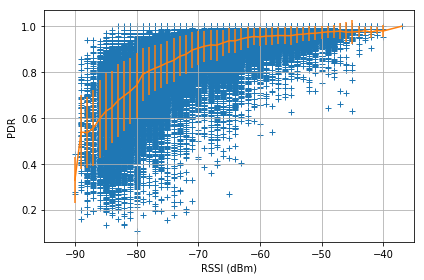

In [3]:
df_indexed = df_clean.set_index(df_clean["rssi"])

df_grouped = df_indexed.groupby(["rssi"])

mean_index = [name for name, group in df_grouped]
mean_pdr   = [group.pdr.mean() for name, group in df_grouped]
std_pdr    = [group.pdr.std() for name, group in df_grouped]

plt.plot(df_indexed.rssi, df_indexed.pdr, '+', zorder=0)
plt.errorbar(mean_index, mean_pdr, std_pdr)

plt.xlabel('RSSI (dBm)')
plt.ylabel('PDR')
plt.xlim([-95, -35])
plt.tight_layout()

plt.grid(True)

plt.savefig("../figures/waterfall_building.png", format='png', bbox_inches='tight', pad_inches=0)
plt.show()